In [1]:
import os
import time
import numpy as np
from matplotlib import pyplot as plt

from utils.multi_template_attack import TemplateAttackTrainer
from datasets.dpav4 import DPAv4
from trials.utils import *

In [2]:
stats_path = os.path.join('..', 'outputs', 'dpav4', 'first_order_stats', 'stats.npy')
stats = np.load(stats_path)
snr = stats[0, :]
profiling_dataset = DPAv4(root=r'/mnt/hdd/jgammell/leakage_localization/downloads/dpav4', train=True)
attack_dataset = DPAv4(root=r'/mnt/hdd/jgammell/leakage_localization/downloads/dpav4', train=False)

In [3]:
trainer = TemplateAttackTrainer(profiling_dataset, attack_dataset, window_size=3, max_parallel_timesteps=100)
info = trainer.get_info()

0it [00:00, ?it/s]

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name              | Type                | Params | Mode 
------------------------------------------------------------------
0 | template_attacker | MultiTemplateAttack | 150 K  | train
------------------------------------------------------------------
150 K     Trainable params
0         Non-trainable params
150 K     Total params
0.602     Total estimated model params size (MB)
1         Modules in train mode
0         Modules in eval mode
/home/jgammell/micromamba/envs/leakage-localization/lib/python3.9/site-packages/lightning/pytorch/trainer/connectors/data_connector.py:424: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=47` in the `DataLoader` to improve performance.
`Trainer.fit` stopped: `max_steps=100` reached.
GP

Text(0, 0.5, 'Mean rank')

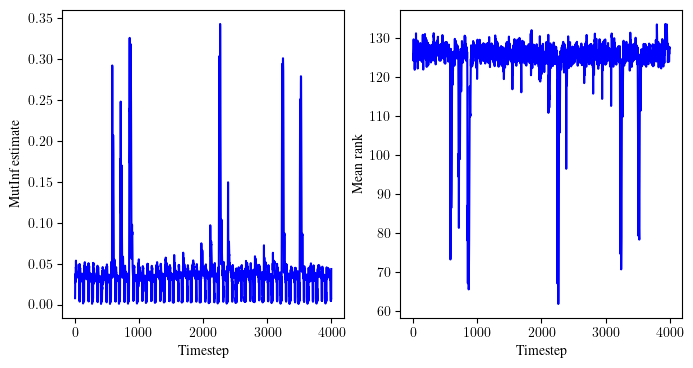

In [4]:
fig, axes = plt.subplots(1, 2, figsize=(8, 4))
axes[0].plot(info['mutinf'], color='blue')
axes[1].plot(info['rank'], color='blue')
axes[0].set_xlabel('Timestep')
axes[1].set_xlabel('Timestep')
axes[0].set_ylabel('MutInf estimate')
axes[1].set_ylabel('Mean rank')